## 1. Importing the data files and joining them

In [37]:
import pandas as pd

triplets = 'https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata = 'https://static.turi.com/datasets/millionsong/song_data.csv'

song_df_1 = pd.read_table(triplets,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

song_df_2 =  pd.read_csv(songs_metadata)


In [38]:
df = pd.merge(song_df_1, song_df_2, on="song_id", how="left")

In [39]:
df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005


In [40]:
# Drop duplicate rows if exist

df = df.drop_duplicates()
df.shape

(2054534, 7)

In [41]:
import matplotlib.pyplot as plt

songsplot = df.groupby(['song_id','title','release','artist_name']).agg({'listen_count': 'sum'}).reset_index()

In [42]:
len(songsplot['listen_count'].values)

10131

Text(0, 0.5, 'Listen Count')

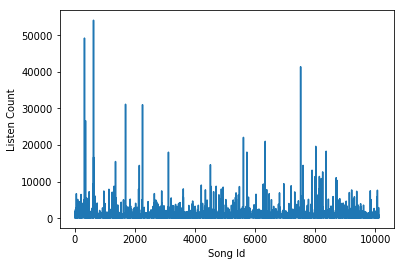

In [43]:
plt.plot(songsplot['listen_count'].values)
plt.xlabel('Song Id')
plt.ylabel('Listen Count')

In [44]:
songsplot.sort_values('listen_count',ascending=False)[0:10]

,song_id,title,release,artist_name,listen_count
623,SOBONKR12A58A7A7E0,You're The One,If There Was A Way,Dwight Yoakam,54136
322,SOAUWYT12A81C206F1,Undo,Vespertine Live,Björk,49253
7516,SOSXLTC12AF72A7F54,Revelry,Only By The Night,Kings Of Leon,41418
1689,SOEGIYH12A6D4FC0E3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,31153
2254,SOFRQTD12A81C233C0,Sehr kosmisch,Musik von Harmonia,Harmonia,31036
357,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Now That's What I Call Music! 75,Florence + The Machine,26663
5613,SONYKOW12AB01849C9,Secrets,Waking Up,OneRepublic,22100
6338,SOPUCYA12A8C13A694,Canada,The End Is Here,Five Iron Frenzy,21019
8020,SOUFTBI12AB0183F65,Invalid,Fermi Paradox,Tub Ring,19645
8366,SOVDSJC12A58A7A271,Ain't Misbehavin,Summertime,Sam Cooke,18309


## 2. Rating calculation

In [45]:
sum_listen_count = df.groupby(['user_id']).agg({'listen_count': 'sum'}).reset_index()
count_listen_count = df.groupby(['user_id']).agg({'listen_count': 'count'}).reset_index()
mean_listen_count = df.groupby(['user_id']).agg({'listen_count': 'mean'}).reset_index()

In [46]:
sum_listen_count.shape

(76353, 2)

In [47]:
# Create columns in the dataframe for sum_listen_count, mean_listen_count and rating

song_df_new = pd.merge(df, sum_listen_count, on='user_id', how="left").rename(columns = {'listen_count_y':'sum_listen_count'})
song_df_new = song_df_new.rename(columns = {'listen_count_x':'listen_count'})
song_df_new = pd.merge(song_df_new, mean_listen_count, on='user_id', how="left").rename(columns = {'listen_count_y':'mean_listen_count'})
song_df_new = song_df_new.rename(columns = {'listen_count_x':'listen_count'})
song_df_new = pd.merge(song_df_new, count_listen_count, on='user_id', how="left").rename(columns = {'listen_count_y':'number_songs'})
song_df_new = song_df_new.rename(columns = {'listen_count_x':'listen_count'})

In [48]:
song_df_new['rating'] = round((song_df_new['listen_count']/song_df_new['sum_listen_count'])*100,2)

In [49]:
song_df_new[song_df_new['user_id']=='b80344d063b5ccb3212f76538f3d9e43d87dca9e']

,user_id,song_id,listen_count,title,release,artist_name,year,sum_listen_count,mean_listen_count,number_songs,rating
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,71,1.577778,45,1.41
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,71,1.577778,45,2.82
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,71,1.577778,45,1.41
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,71,1.577778,45,1.41
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,71,1.577778,45,1.41
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007,71,1.577778,45,7.04
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008,71,1.577778,45,1.41
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999,71,1.577778,45,1.41
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0,71,1.577778,45,1.41
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002,71,1.577778,45,1.41


In [50]:
song_df_new.shape

(2054534, 11)

Text(0, 0.5, 'Total Listens')

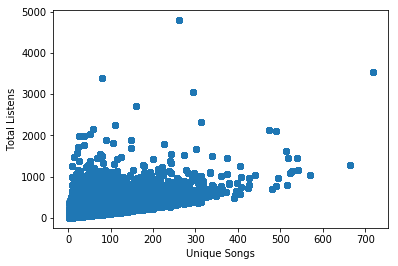

In [51]:
plt.scatter(song_df_new['number_songs'],song_df_new['sum_listen_count'])
plt.xlabel('Unique Songs')
plt.ylabel('Total Listens')

## 3. Filtering dataframe

In [52]:
filtered_df = song_df_new[(song_df_new['rating']<100) & (song_df_new['mean_listen_count'] > 2) & (song_df_new['number_songs']>=15) & (song_df_new['year']>0)]

In [53]:
# Print the number of unique user_id
n = len(filtered_df['user_id'].unique())
print(n)

24747


## 4. Take a sample from the main dataframe

In [54]:
sample = filtered_df.sample(n=round(n*0.005), replace=False, random_state=42)

In [55]:
# Print the number of unique user_id

len(sample['user_id'])

124

In [56]:
filtered_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,sum_listen_count,mean_listen_count,number_songs,rating
56,969cc6fb74e076a68e36a04409cb9d3765757508,SOABRAB12A6D4F7AAF,2,A Pain That Im Used To,Playing The Angel,Depeche Mode,2005,63,3.315789,19,3.17
57,969cc6fb74e076a68e36a04409cb9d3765757508,SOAOQFD12A6D4FAAA9,1,Medicating,Trainwreck,Boys Night Out,2005,63,3.315789,19,1.59
58,969cc6fb74e076a68e36a04409cb9d3765757508,SOBFPJC12A58A7D1AB,9,Crystal Blue Persuasion,Anthology,Tommy James And The Shondells,1968,63,3.315789,19,14.29
59,969cc6fb74e076a68e36a04409cb9d3765757508,SOBZZDU12A6310D8A3,2,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986,63,3.315789,19,3.17
61,969cc6fb74e076a68e36a04409cb9d3765757508,SOERVXG12A6D4F5583,1,Besame Mucho,The Best of Andrea Bocelli - 'Vivere',Andrea Bocelli,2006,63,3.315789,19,1.59


In [57]:
# Get the list of user_ids in the sample dataframe
user_ids_set = set(sample['user_id'])

In [58]:
print(user_ids_set)

{'3767b68b25ac656b9871419bcc8a081d7a899923', 'bbccd11cf3f7f412c25e3237efdd5a162eae68de', 'eeccd99b67dcb5fe0b789972f67b457a8485c52a', 'fe2314259d533156c740a8a62930957414a79ef8', '633a89f69fa56ffc0643831d9840c60af01f42e9', '425a1df769f1e9ab022df488d3d50561baeec7a4', 'ebd84c0dae25cf66a00f4d4e7773b9504411850f', '7c51cae5822e66b90b03a49f2502267a320980ef', '9539150cb38b53ff4bb8ac385a97697bdc83e25d', '5df77ee8c610dc234899a06dccf5a269813156af', '4e6ed56ac1dfb217c087fc35f147e8502e9a880b', 'd44a5a0dcb0d06a91c85bfe51d9c337a8a4ce42b', '52355c9b03c933e39eafac5a08f62c43f295fdb0', '8491d4d03a4ad9d26475242c6c84a3cb87d07316', '32ab89849329f38786a24ff7414622eb25b4745a', '2c2d81f1365bd836aba1ba6c8789f8e4a4b87fdd', '8eac78565e3da16a8e3a6fec6a8e20193a29e6fa', '9e3cde96cd47f550fce1a0b30ad78ecc1213095e', '40a699e5088c2e7ed5199a291a756e36234d2ac9', 'c2a0d9df42e02d00c3412d4c3e3c21868b38aba3', '0d8105989ecacb008d3a380f11f749bf0bca43c0', '01a1f7e92dae95a84f2170fe20e9da77c5f3e1c2', '0f503509db91d5870ab683170af694

In [59]:
final_arr = []
for index,row in filtered_df.iterrows():
    if row[0] in user_ids_set:
        final_arr.append([row[0],row[1],row[-1],row[3],row[4],row[5]])

In [60]:
for r in final_arr[0:10]:
    print(r)

['1645b689f873529ab85e3b72742be44813e82bd3', 'SOBYHAJ12A6701BF1D', 2.38, 'Constellations', 'In Between Dreams', 'Jack Johnson']
['1645b689f873529ab85e3b72742be44813e82bd3', 'SOBZCUC12A58A7D9AD', 2.38, "We're Going To Be Friends", 'Sing-A-Longs & Lullabies For The Film Curious George', 'Jack Johnson']
['1645b689f873529ab85e3b72742be44813e82bd3', 'SOCVTLJ12A6310F0FD', 7.14, 'Clocks', 'A Rush Of Blood To The Head', 'Coldplay']
['1645b689f873529ab85e3b72742be44813e82bd3', 'SOIJHHU12AF7299A88', 2.38, 'Supposed To Be', 'Sing-A-Longs & Lullabies For The Film Curious George', 'Jack Johnson']
['1645b689f873529ab85e3b72742be44813e82bd3', 'SOJXYVV12A8C1373FD', 2.38, 'Born To Run', 'The Essential Bruce Springsteen', 'Bruce Springsteen']
['1645b689f873529ab85e3b72742be44813e82bd3', 'SOKENKR12AB01828F7', 4.76, 'Interactive Halloween Bear', 'TV Loves You Back', 'Restiform Bodies']
['1645b689f873529ab85e3b72742be44813e82bd3', 'SOKHHXJ12AF72A5325', 9.52, 'People Watching', 'Sing-A-Longs & Lullabies For

In [61]:
final_df = filtered_df[(filtered_df['user_id'].isin(user_ids_set))]

In [62]:
final_df.shape

(8067, 11)

## 5. Create Neo4j connection

In [63]:
from neo4jrestclient.client import GraphDatabase
 
graph = GraphDatabase("http://localhost:7474", username="neo4j", password="ironman")


In [64]:
clear_query = "match (n) detach delete (n)"
r2 = graph.query(clear_query)

## 6. Put the data into Neo4j

In [65]:
for index,row in final_df.iterrows():

    user_id=row[0]
    song_id=row[1]
    title=row[3].replace('"', '')
    artist=row[5].replace('"', '')
    album=row[4].replace('"', '')
    rating=row[-1]
    q1 = "MERGE (user:User {id: \""+user_id+"\"}) MERGE (song:Song {song_id: \""+song_id+"\", title: \""+title+"\", artist: \""+artist+"\", album: \""+album+"\"}) CREATE (user)-[r:RATED {rating: \""+str(round(rating,2))+"\"}]->(song) SET r.rating = TOFLOAT(\""+str(round(rating,2))+"\")"
    tx = graph.query(q1)


## 7. Find similarities between users using collaborative filtering

In [72]:
query1 ="MATCH (p1:User)-[x:RATED]->(s:Song)<-[y:RATED]-(p2:User) WITH SUM(x.rating * y.rating) AS xyDotProduct, SQRT(REDUCE(xDot = 0.0, a IN COLLECT(x.rating) | xDot + a^2)) AS xLength, \
 SQRT(REDUCE(yDot = 0.0, b IN COLLECT(y.rating) | yDot + b^2)) AS yLength, p1, p2 MERGE (p1)-[s:SIMILARITY]-(p2) \
SET s.similarity = xyDotProduct / (xLength * yLength)" 


tx2 = graph.query(query1)


In [67]:
final_df.head(10)

,user_id,song_id,listen_count,title,release,artist_name,year,sum_listen_count,mean_listen_count,number_songs,rating
7837,1645b689f873529ab85e3b72742be44813e82bd3,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,42,2.333333,18,2.38
7838,1645b689f873529ab85e3b72742be44813e82bd3,SOBZCUC12A58A7D9AD,1,We're Going To Be Friends,Sing-A-Longs & Lullabies For The Film Curious ...,Jack Johnson,2006,42,2.333333,18,2.38
7839,1645b689f873529ab85e3b72742be44813e82bd3,SOCVTLJ12A6310F0FD,3,Clocks,A Rush Of Blood To The Head,Coldplay,2002,42,2.333333,18,7.14
7840,1645b689f873529ab85e3b72742be44813e82bd3,SOIJHHU12AF7299A88,1,Supposed To Be,Sing-A-Longs & Lullabies For The Film Curious ...,Jack Johnson,2006,42,2.333333,18,2.38
7841,1645b689f873529ab85e3b72742be44813e82bd3,SOJXYVV12A8C1373FD,1,Born To Run,The Essential Bruce Springsteen,Bruce Springsteen,1975,42,2.333333,18,2.38
7842,1645b689f873529ab85e3b72742be44813e82bd3,SOKENKR12AB01828F7,2,Interactive Halloween Bear,TV Loves You Back,Restiform Bodies,2008,42,2.333333,18,4.76
7843,1645b689f873529ab85e3b72742be44813e82bd3,SOKHHXJ12AF72A5325,4,People Watching,Sing-A-Longs & Lullabies For The Film Curious ...,Jack Johnson,2006,42,2.333333,18,9.52
7844,1645b689f873529ab85e3b72742be44813e82bd3,SOKLRPJ12A8C13C3FE,7,The Scientist,The Scientist,Coldplay,2002,42,2.333333,18,16.67
7845,1645b689f873529ab85e3b72742be44813e82bd3,SOKMXEQ12A6D4F6AA8,1,Talk Of The Town,Sing-A-Longs & Lullabies For The Film Curious ...,Jack Johnson / Kawika Kahiapo,2006,42,2.333333,18,2.38
7846,1645b689f873529ab85e3b72742be44813e82bd3,SOKUTUM12A6701D9CD,1,Do You Remember,In Between Dreams,Jack Johnson,2005,42,2.333333,18,2.38


## 8. Query to find user's actual rating

In [73]:
from neo4jrestclient import client

query2 = "MATCH (a:User {id:'633a89f69fa56ffc0643831d9840c60af01f42e9'})-[r:RATED]->(m:Song) RETURN m.song_id AS song_id, m.title AS title, m.artist AS artist, r.rating AS rating"

result1 = graph.query(query2,data_contents=True)


In [74]:
for each in result1[0:11]:
    print(each)

['SOZVCRW12A67ADA0B7', 'When You Were Young', 'The Killers', 0.23]
['SOZQRSR12A6701E2F7', 'Senza Una Donna (Without A Woman)', 'Zucchero / Paul Young', 1.17]
['SOZDACG12AB01853BB', 'Eple', 'Röyksopp', 0.23]
['SOYIWVC12A8AE47F31', "It's Christmas So We'll Stop (Choir Version)", "The Pretend It's December Choir", 0.47]
['SOYGQGR12AF72ABAB8', 'Janglin', 'Edward Sharpe & The Magnetic Zeros', 0.23]
['SOXUMBC12AB018DA2B', 'Nothing Like You', 'Frightened Rabbit', 0.23]
['SOXQYSC12A6310E908', 'Bitter Sweet Symphony', 'The Verve', 0.47]
['SOXPFLM12A8AE48C50', 'Electric Feel', 'MGMT', 0.47]
['SOXNZUH12AB018393F', 'Happy Up Here', 'Royksopp', 0.47]
['SOXIRXE12AB017BD94', 'The Stars of Track and Field', 'Belle and Sebastian', 0.23]
['SOXFXDH12A8C13326E', 'The Kids Don\x19t Stand A Chance (Album)', 'Vampire Weekend', 0.23]


## 9. Recommend a user based on the similarity in rating given by other similar users

In [75]:
query3 = "MATCH (b:User)-[r:RATED]->(m:Song), (b)-[s:SIMILARITY]-(a:User {id:'633a89f69fa56ffc0643831d9840c60af01f42e9'}) \
    WITH m, s.similarity AS similarity, r.rating AS rating \
    ORDER BY m.title, similarity DESC \
    WITH m.song_id AS song_id, COLLECT(rating)[0..3] AS ratings \
    WITH song_id, REDUCE(s = 0, i IN ratings | s + i)*1.0 / LENGTH(ratings) AS reco \
    ORDER BY reco DESC \
    RETURN song_id AS song_id, reco AS recommendation \
    "

result2 = graph.query(query3,data_contents=True)

In [76]:
for each in list(result2[0:11]):
    r = song_df_new[song_df_new['song_id']==each[0]][['song_id','title','artist_name']].drop_duplicates(keep='last').values[0]
    print(r,each[1])

['SOSDIHQ12A8C13C23F' 'Close My Eyes' 'Matisyahu'] 28.0
['SOWHTFY12A6702184E' 'Emerge' 'Fischerspooner'] 25.51
['SOCNIFM12A8C13D73B' 'Ona Kasuita' 'Che Sudaka'] 25.25
['SOGDJPO12A8C13C1F9' 'King Without A Crown' 'Matisyahu'] 24.0
['SOIKQFR12A6310F2A6' "Lord I Guess I'll Never Know" 'The Verve'] 21.74
['SOUEGBF12AB017EFD5' 'Van Helsing Boombox' 'Man Man'] 21.2
['SOFJMYJ12A6D4F8E59' 'One More Time (Short Radio Edit)' 'Daft Punk'] 20.24
['SOKGULH12A6D4F70BB' 'Pepper' 'Butthole Surfers'] 18.255000000000003
['SOYNEAI12A8C14172D' 'Eyes On Fire' 'Blue Foundation'] 17.31
['SOPMZAM12A58A7C56B' "I'll Write A Song For You" 'Earth_ Wind & Fire'] 17.09
['SODYZAD12A58A7A525' 'Demon Cleaner' 'Kyuss'] 16.06
